In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [110]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
dataset=pd.read_csv('/Users/jrudram/Downloads/extended_data.csv')

## In the cars data all cars are used cars.

### 1.Model_year:This is year of Manufacturing of car.
### 2.Brand : Name of car brand.
### 3.Model: specific model of the car model.
### 4.Type: type of the vehicle eg suv(sports utility vehicle)etc.
### 5.mpg:Fuel efficiency of the car
### 6.Premium_version: binary value for premium car or not
### 7.Msrp:Price of the car (this is the target variable or dependent variable)
### 8.Collection_car:Where the car is collection item or not by binary filed

In [112]:
dataset

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1
28141,2022,Land,Rover Range Rover Velar P380 SE R-Dynamic,SUV,20.0,1,63700.0,0


In [113]:
dataset.head(2)

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0


In [114]:
dataset.iloc[:-1,:]

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1
...,...,...,...,...,...,...,...,...
28137,2022,RAM,750 iL,Pickup,20.0,0,35000.0,0
28138,2017,Bentley,Huracan LP580-2S,Coupe,21.0,1,200000.0,1
28139,2001,Mazda,RX-8 Sport,Coupe,18.0,0,25000.0,0
28140,2018,Ford,Model X P100D,SUV,94.0,1,199000.0,1


In [115]:
dataset.columns

Index(['model_year', 'brand', 'model', 'type', 'miles_per_gallon',
       'premium_version', 'msrp', 'collection_car'],
      dtype='object')

In [116]:
dataset.dtypes

model_year            int64
brand                object
model                object
type                 object
miles_per_gallon    float64
premium_version       int64
msrp                float64
collection_car        int64
dtype: object

In [117]:
dataset.select_dtypes(include=["int64","float64"]).columns

Index(['model_year', 'miles_per_gallon', 'premium_version', 'msrp',
       'collection_car'],
      dtype='object')

In [118]:
dataset.select_dtypes(include="object").columns

Index(['brand', 'model', 'type'], dtype='object')

In [119]:
dataset["model_year"].unique()

array([2016, 2014, 2002, 2012, 2008, 2013, 2021, 2017, 2019, 2020, 2023,
       2018, 2004, 2022, 2015, 2009, 2011, 2010, 2001, 2007, 2005, 2000,
       2003, 2006, 1999, 1997, 2024, 1993, 1994, 1998, 1995, 1996, 1992,
       1974, 1982, 1988])

In [120]:
dataset.shape

(28143, 8)

In [121]:
dataset.head()

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0
2,2002,Ford,Mustang GT,Coupe,16.0,0,26250.0,0
3,2012,BMW,428 Gran Coupe i xDrive,Sedan,27.0,1,45000.0,0
4,2008,Mercedes-Benz,SL-Class SL500 Roadster,Convertible,18.0,1,100000.0,1


# Data preprocessing

In [122]:
dataset.isnull().any().sum()

2

### There are only two null values in the dataset

In [123]:
dataset.isnull().any()

model_year          False
brand               False
model               False
type                False
miles_per_gallon     True
premium_version     False
msrp                 True
collection_car      False
dtype: bool

### only in the columns miles_per_gallon and msrp

In [124]:
from sklearn.impute import SimpleImputer
s=SimpleImputer(strategy='mean')
dataset['miles_per_gallon']=s.fit_transform(dataset[['miles_per_gallon']])
dataset['msrp']=s.fit_transform(dataset[['msrp']])

In [125]:
dataset.isnull().sum()

model_year          0
brand               0
model               0
type                0
miles_per_gallon    0
premium_version     0
msrp                0
collection_car      0
dtype: int64

### All the null values are imputed by mean

In [126]:
dataset.dropna(how="all", inplace=True)

### Now checking the ouliers in the data

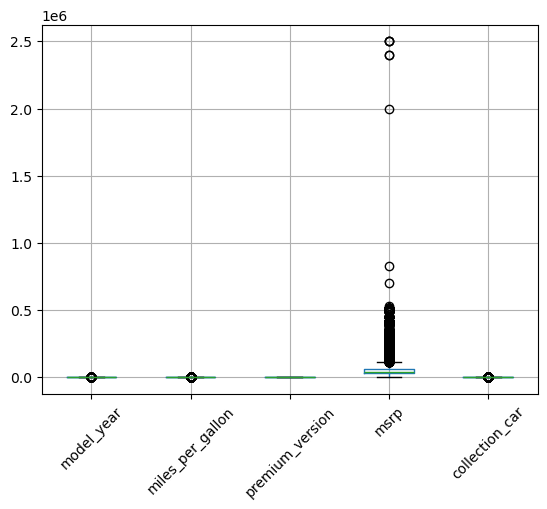

In [127]:
dataset.boxplot()
plt.xticks(rotation=45)
plt.show()

### Only one column that is outliers are present that is msrp

In [128]:
def handling_outlier(dataset, columns):
    for column in columns:
        q1 = dataset[column].quantile(0.25)
        q3 = dataset[column].quantile(0.75)
        IQR = q3 - q1
        upper_boundary = q3 + (1.5 * IQR)
        lower_boundary = q1 - (1.5 * IQR)
        dataset[column] = dataset[column].apply(
            lambda x: upper_boundary if x > upper_boundary else (lower_boundary if x < lower_boundary else x)
        )
    return dataset

In [129]:
dataset.head(2)

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
0,2016,Toyota,Land Cruiser Base,SUV,13.0,1,84900.0,0
1,2014,RAM,ProMaster 2500 Window Van High Roof,Van,15.0,0,35000.0,0


In [130]:
new_data=handling_outlier(dataset,['msrp'])


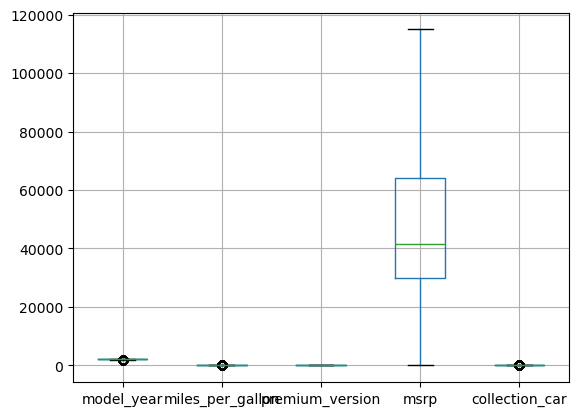

In [131]:
new_data.boxplot()
plt.show()

### All the outliers are removed from the data

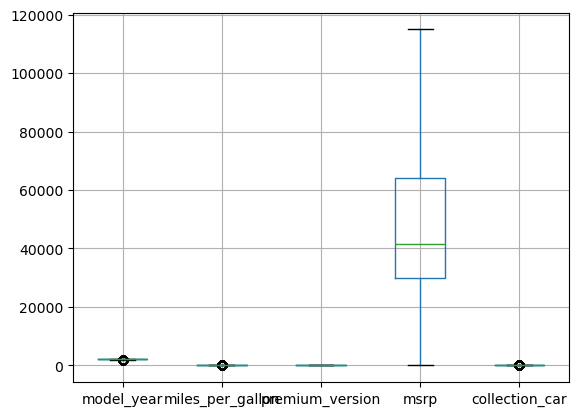

In [132]:
dataset.boxplot()
plt.show()

In [133]:
dataset.select_dtypes(include='object').columns

Index(['brand', 'model', 'type'], dtype='object')

In [134]:
dataset.select_dtypes(include='object').value_counts()

brand    model                  type       
Toyota   Land Cruiser Base      SUV            33
Jeep     Wrangler Sport         SUV            32
Ford     Mustang GT             Coupe          30
Honda    Civic EX               Sedan          30
Porsche  911 Carrera Cabriolet  Convertible    29
                                               ..
Honda    RX 350 Base            SUV             1
         Rogue SV               SUV             1
         S2000 Base             Coupe           1
         SLK-Class SLK320       Convertible     1
smart    Nautilus Reserve       SUV             1
Name: count, Length: 4712, dtype: int64

In [135]:
dataset['brand'].value_counts()


brand
Ford             2448
Chevrolet        1950
Mercedes-Benz    1918
BMW              1902
Toyota           1715
Audi             1553
Porsche          1341
Nissan           1094
Lexus             969
Land              948
Dodge             833
Cadillac          810
Jeep              791
Mazda             670
Acura             661
Volkswagen        640
GMC               602
Subaru            583
Honda             562
Hyundai           554
Kia               527
Lincoln           472
INFINITI          471
RAM               399
Jaguar            369
Volvo             341
Tesla             290
Chrysler          265
Bentley           237
Maserati          234
Mitsubishi        233
Buick             230
Lamborghini       223
Genesis           184
Ferrari           152
MINI              142
Pontiac           135
Aston              91
Rolls-Royce        84
Alfa               77
Scion              60
Hummer             55
McLaren            46
FIAT               44
Saturn             44
Lotu

In [136]:
dataset['model'].value_counts()


model
M3 Base                         64
Wrangler Sport                  52
M4 Base                         44
GT-R Premium                    44
911 Carrera                     41
                                ..
X5 eDrive xDrive40e              2
V60 T6 R-Design Platinum         2
X5 xDrive 35i Sport Activity     2
allroad 2.7T                     1
X5 3.0i                          1
Name: count, Length: 1898, dtype: int64

In [137]:
dataset['type'].value_counts()


type
SUV            9978
Sedan          8125
Coupe          4163
Pickup         2961
Convertible    1310
Hatchback       759
Minivan         547
Van             294
Wagon             6
Name: count, dtype: int64

## EDA on the data

#### univariet analysis

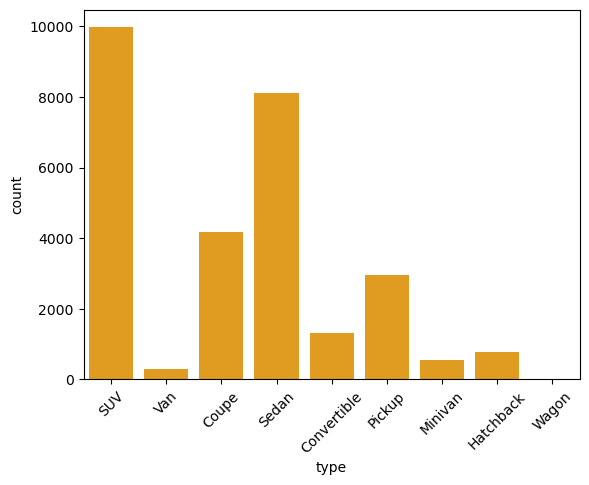

In [138]:
sns.countplot(dataset,x='type', palette=['#FFA500'])
plt.xticks(rotation=45)
plt.show()

### Most of the cars are type of SUV are selling the market

In [139]:
dataset.describe(include='all')

,model_year,brand,model,type,miles_per_gallon,premium_version,msrp,collection_car
count,28143.000000,28143,28143,28143,28143.000000,28143.000000,28143.000000,28143.000000
unique,NaN,57,1898,9,NaN,NaN,NaN,NaN
top,NaN,Ford,M3 Base,SUV,NaN,NaN,NaN,NaN
freq,NaN,2448,64,9978,NaN,NaN,NaN,NaN
mean,2013.456774,NaN,NaN,NaN,21.769242,0.533525,50591.865616,0.137299
std,6.847536,NaN,NaN,NaN,13.468108,0.498884,28133.817673,0.344169
min,1974.000000,NaN,NaN,NaN,-1.000000,0.000000,0.000000,0.000000
25%,2009.000000,NaN,NaN,NaN,17.000000,0.000000,30000.000000,0.000000
50%,2015.000000,NaN,NaN,NaN,20.000000,1.000000,41370.000000,0.000000
75%,2019.000000,NaN,NaN,NaN,24.000000,1.000000,64000.000000,0.000000


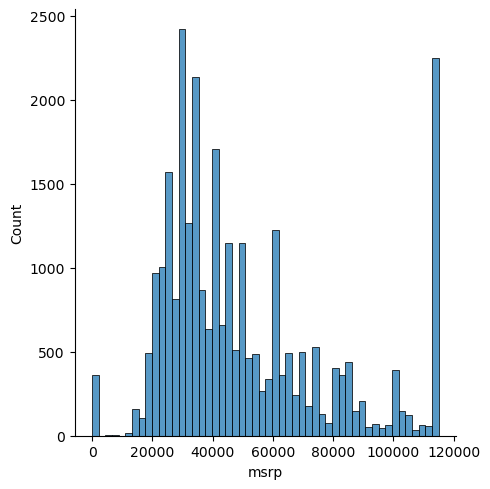

In [140]:
sns.displot(data=dataset,x='msrp')
plt.show()

In [141]:
sns.kdeplot(data=dataset,x='msrp')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

### Its slightly right skew data

## Bivarite analysis

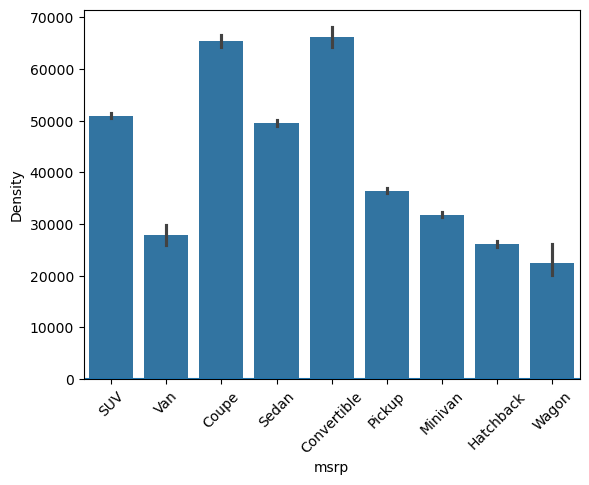

In [142]:
sns.barplot(data=dataset,x='type',y='msrp')
plt.xticks(rotation=45)
plt.show()

### From the above graph observed highest car prices are from convertible and coupe.And least price is Wagon and hatchback

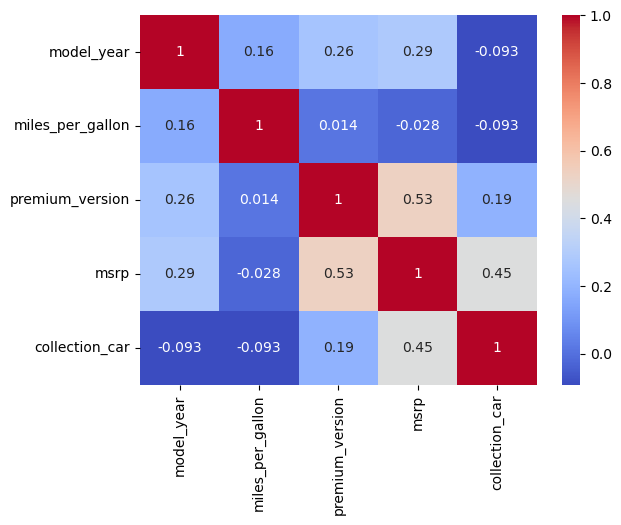

In [143]:
numeric_data = dataset.select_dtypes(include=["int64","float64"])

sns.heatmap(numeric_data.corr(),cmap="coolwarm",annot=True)
plt.show()


## from above heat map there is no high correlation between the numerical variables

In [144]:
cat_col=['brand','model','type']

In [145]:
for col in cat_col:
    freq_enc = dataset[col].value_counts(normalize=True)
    print(freq_enc)
    dataset[col] = dataset[col].map(freq_enc)
    

brand
Ford             0.086984
Chevrolet        0.069289
Mercedes-Benz    0.068152
BMW              0.067583
Toyota           0.060939
Audi             0.055182
Porsche          0.047650
Nissan           0.038873
Lexus            0.034431
Land             0.033685
Dodge            0.029599
Cadillac         0.028782
Jeep             0.028106
Mazda            0.023807
Acura            0.023487
Volkswagen       0.022741
GMC              0.021391
Subaru           0.020716
Honda            0.019969
Hyundai          0.019685
Kia              0.018726
Lincoln          0.016771
INFINITI         0.016736
RAM              0.014178
Jaguar           0.013112
Volvo            0.012117
Tesla            0.010305
Chrysler         0.009416
Bentley          0.008421
Maserati         0.008315
Mitsubishi       0.008279
Buick            0.008173
Lamborghini      0.007924
Genesis          0.006538
Ferrari          0.005401
MINI             0.005046
Pontiac          0.004797
Aston            0.003233
Rolls-

# Spliting the data into X and y

In [146]:
#Independent Varible / Inputs / Features
# Independent Variables (Features)
X = dataset.drop(columns=["msrp"])
# Dependent Variable (Target)
y = dataset["msrp"]


In [147]:
X.head()

,model_year,brand,model,type,miles_per_gallon,premium_version,collection_car
0,2016,0.060939,0.001386,0.354546,13.0,1,0
1,2014,0.014178,0.000640,0.010447,15.0,0,0
2,2002,0.086984,0.001137,0.147923,16.0,0,0
3,2012,0.067583,0.000426,0.288704,27.0,1,0
4,2008,0.068152,0.000817,0.046548,18.0,1,1


In [148]:
y.head()

0     84900.0
1     35000.0
2     26250.0
3     45000.0
4    100000.0
Name: msrp, dtype: float64

### The more costly among all is Convertible and less cost is Wagon

In [149]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

## Split data in Train and Test

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X.shape


(28143, 7)

In [152]:
y.shape

(28143,)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 20)

In [154]:
X_train.shape

(22514, 7)

In [155]:
X_train

,model_year,brand,model,type,miles_per_gallon,premium_version,collection_car
6955,2021,0.008315,0.000640,0.354546,22.0,1,0
2178,2014,0.055182,0.000391,0.288704,22.0,1,0
20869,2012,0.016736,0.000462,0.288704,29.0,1,0
7148,2020,0.028106,0.001208,0.354546,24.0,1,0
9047,2007,0.086984,0.000640,0.105213,15.0,0,0
...,...,...,...,...,...,...,...
23452,2010,0.060939,0.000391,0.019436,24.0,0,0
23775,1999,0.038873,0.001563,0.147923,20.0,1,1
4367,2017,0.069289,0.000640,0.105213,18.0,0,0
27098,1998,0.086984,0.001315,0.105213,15.0,0,0


In [156]:
X_col=X.columns

In [157]:
X_test.shape

(5629, 7)

### scaling

In [158]:
sc= MinMaxScaler()

In [159]:
X_train=sc.fit_transform(X_train)

In [160]:
X_test=sc.transform(X_test)

In [161]:
X_train

array([[0.94      , 0.09447853, 0.26984127, ..., 0.09787234, 1.        ,
        0.        ],
       [0.8       , 0.63394683, 0.15873016, ..., 0.09787234, 1.        ,
        0.        ],
       [0.76      , 0.19141104, 0.19047619, ..., 0.12765957, 1.        ,
        0.        ],
       ...,
       [0.86      , 0.79631902, 0.26984127, ..., 0.08085106, 0.        ,
        0.        ],
       [0.48      , 1.        , 0.57142857, ..., 0.06808511, 0.        ,
        0.        ],
       [0.88      , 0.77668712, 0.6031746 , ..., 0.08085106, 1.        ,
        0.        ]])

In [162]:
X_train

array([[0.94      , 0.09447853, 0.26984127, ..., 0.09787234, 1.        ,
        0.        ],
       [0.8       , 0.63394683, 0.15873016, ..., 0.09787234, 1.        ,
        0.        ],
       [0.76      , 0.19141104, 0.19047619, ..., 0.12765957, 1.        ,
        0.        ],
       ...,
       [0.86      , 0.79631902, 0.26984127, ..., 0.08085106, 0.        ,
        0.        ],
       [0.48      , 1.        , 0.57142857, ..., 0.06808511, 0.        ,
        0.        ],
       [0.88      , 0.77668712, 0.6031746 , ..., 0.08085106, 1.        ,
        0.        ]])

### Creating the data frame for model process

In [163]:
X_train=pd.DataFrame(data=X_train,columns=X_col)

In [164]:
X_test=pd.DataFrame(data=X_test,columns=X_col)

In [165]:
X_train

,model_year,brand,model,type,miles_per_gallon,premium_version,collection_car
0,0.94,0.094479,0.269841,1.000000,0.097872,1.0,0.0
1,0.80,0.633947,0.158730,0.814180,0.097872,1.0,0.0
2,0.76,0.191411,0.190476,0.814180,0.127660,1.0,0.0
3,0.92,0.322290,0.523810,1.000000,0.106383,1.0,0.0
4,0.66,1.000000,0.269841,0.296330,0.068085,0.0,0.0
...,...,...,...,...,...,...,...
22509,0.72,0.700204,0.158730,0.054252,0.106383,0.0,0.0
22510,0.50,0.446217,0.682540,0.416867,0.089362,1.0,1.0
22511,0.86,0.796319,0.269841,0.296330,0.080851,0.0,0.0
22512,0.48,1.000000,0.571429,0.296330,0.068085,0.0,0.0


In [166]:
X_test

,model_year,brand,model,type,miles_per_gallon,premium_version,collection_car
0,0.92,0.776687,0.206349,1.000000,0.089362,1.0,0.0
1,0.80,0.191411,0.126984,0.814180,0.089362,1.0,0.0
2,0.56,0.228630,0.412698,1.000000,0.089362,0.0,0.0
3,0.82,0.386503,0.349206,1.000000,0.089362,1.0,0.0
4,0.88,1.000000,0.190476,1.000000,0.097872,1.0,0.0
...,...,...,...,...,...,...,...
5624,0.96,0.330061,0.285714,1.000000,0.068085,1.0,0.0
5625,0.66,0.237219,0.428571,0.416867,0.114894,1.0,0.0
5626,0.88,0.783231,0.174603,0.814180,0.102128,1.0,0.0
5627,0.96,0.700204,0.238095,0.416867,0.102128,0.0,0.0


### these are the models used in this use case:
	1.	Linear Regression
	2.	Decision Tree Regressor
	3.	KNN Regressor
	4.	Random Forest Regressor
	5.	Support Vector Regressor (SVR)
	6.	XGBoost Regressor

For feature selection, we use Recursive Feature Elimination (RFE) by taking feature importance from each model.

For hyperparameter tuning, we use GridSearchCV and pass the parameter grid of respective model values into it.

After creating the models, we evaluate them using the following regression-specific metrics:

1.	Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values, giving an overall idea of prediction error.
  
2.	Mean Squared Error (MSE): Computes the average squared differences between actual and predicted values, penalizing larger errors more than smaller ones.
  
3.	Root Mean Squared Error (RMSE): The square root of MSE, which makes interpretation easier as it is in the same unit as the target variable.
  
4.	R-squared (R²): Determines how well the independent variables explain the variance in the dependent variable, with values closer to 1 indicating a better fit.
  
5.	Adjusted R-squared: Adjusts R² for the number of predictors in the model, providing a more accurate performance measure when multiple features are involved.

In [167]:
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Decision Tree', DecisionTreeRegressor(), {
        'regressor__max_depth': [None, 10, 20, 30],
        'regressor__min_samples_split': [2, 5, 10]
    }),
    ('Random Forest', RandomForestRegressor(), {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20]
    }),
    ('AdaBoost', AdaBoostRegressor(), {
        'regressor__n_estimators': [50, 100, 200],
        'regressor__learning_rate': [0.01, 0.1, 1.0]
    })
]



 Model: Linear Regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Foun

 Best parameters found:  {}
📌 MAE: 15515.6307
📌 MSE: 423065622.1312
📌 RMSE: 20568.5591
📌 R² Score: 0.4509


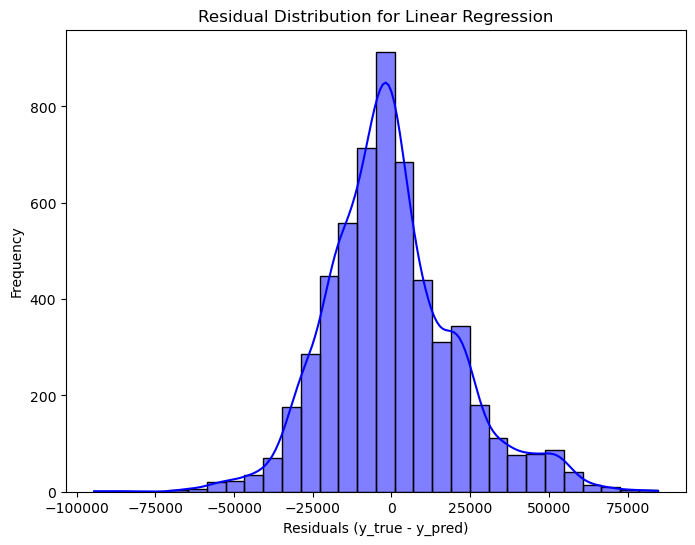


 Model: Decision Tree
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Foun

 Best parameters found:  {'regressor__max_depth': 20, 'regressor__min_samples_split': 10}
📌 MAE: 8478.7153
📌 MSE: 205990553.9518
📌 RMSE: 14352.3710
📌 R² Score: 0.7326


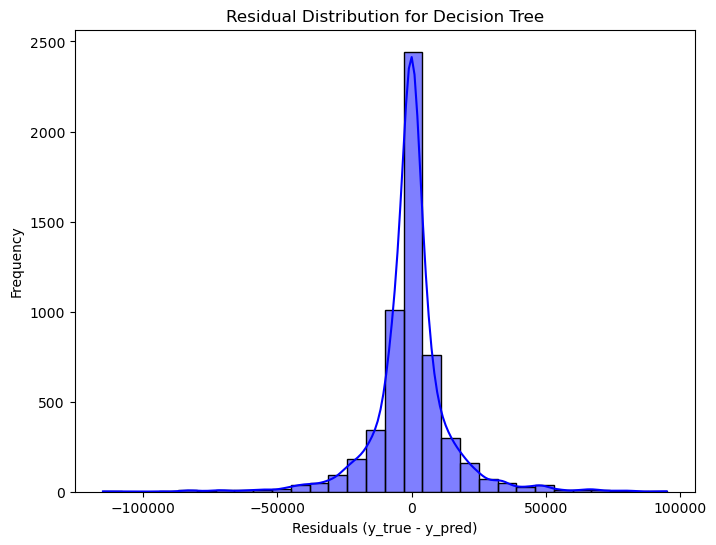


 Model: Random Forest
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Foun

[CV] END regressor__max_depth=None, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__n_estimators=50; total time=   4.5s
[CV] END regressor__max_depth=None, regressor__n_estimators=200; total time=   8.8s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(


[CV] END .................................................... total time=   0.0s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__n_estimators=50

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Foun

[CV] END .................................................... total time=   0.0s
[CV] END regressor__max_depth=None, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__n_estimators

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(


[CV] END .................................................... total time=   0.0s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2; total time=   0.2s
[CV] END regressor__max_depth=None, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__n_estimators=5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Foun

[CV] END regressor__max_depth=None, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__n_estimators=100; total time=   6.0s
[CV] END regressor__max_depth=10, regressor__n_estimators=50; total time=   3.7s
[CV] END regressor__max_depth=10, regressor__n_estimators=50; total time=   3.7s
[CV] END regressor__max_depth=10, regressor__n_estimators=50; total time=   3.5s
[CV] END regressor__max_depth=10, regressor__n_estimators=200; total time=   5.8s
[CV] END regressor__max_depth=20, regressor__n_estimators=100; total time=   5.5s


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(


[CV] END .................................................... total time=   0.0s
[CV] END regressor__max_depth=None, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=10, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=2; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=20, regressor__min_samples_split=10; total time=   0.1s
[CV] END regressor__max_depth=30, regressor__min_samples_split=5; total time=   0.1s
[CV] END regressor__max_depth=None, regressor__n_estimators

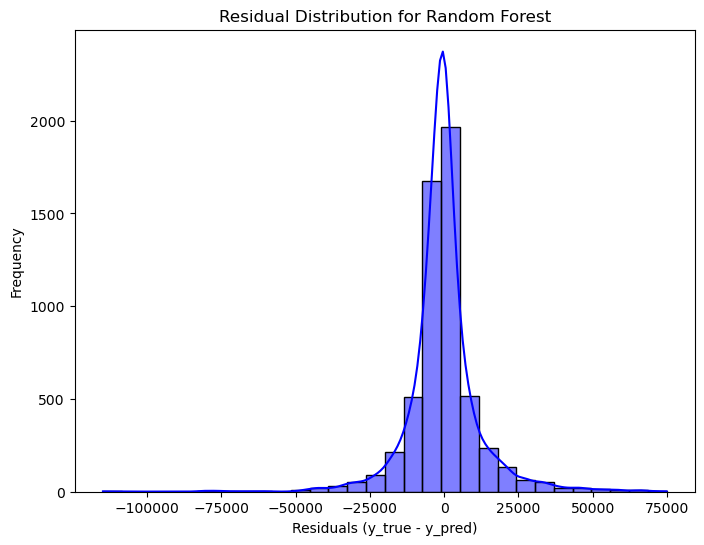


 Model: AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Foun

 Best parameters found:  {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 50}
📌 MAE: 15839.5243
📌 MSE: 399607266.1207
📌 RMSE: 19990.1792
📌 R² Score: 0.4813


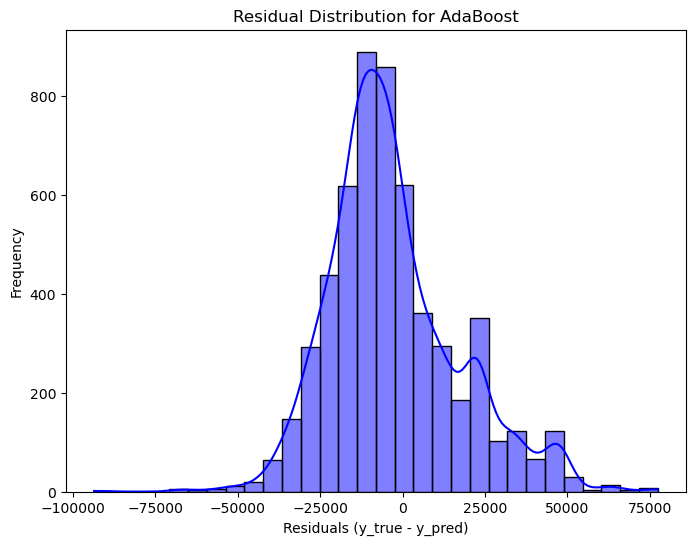


Best Model: Random Forest
 Best R² Score: 0.8132


In [168]:
final = {}
best_model_name = None
best_model = None
best_r2 = -np.inf

for model_name, model, param_grid in models:
    print(f"\n Model: {model_name}")

    pipeline = Pipeline([
        ('feature_selection', RFE(model, n_features_to_select=10)),
        ('regressor', model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Predictions on train & test set
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Calculate Regression Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(" Best parameters found: ", grid_search.best_params_)
    print(f"📌 MAE: {mae:.4f}")
    print(f"📌 MSE: {mse:.4f}")
    print(f"📌 RMSE: {rmse:.4f}")
    print(f"📌 R² Score: {r2:.4f}")

    # Store R² score in dictionary for comparison
    final[model_name] = r2

    # Check if this model is the best so far
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = model_name
        best_model = grid_search.best_estimator_

    # Visualization: Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=True, color='blue')
    plt.xlabel("Residuals (y_true - y_pred)")
    plt.ylabel("Frequency")
    plt.title(f"Residual Distribution for {model_name}")
    plt.show()

# Print the best model and its R² score
print("\nBest Model:", best_model_name)
print(f" Best R² Score: {best_r2:.4f}")



In [169]:
print(best_model)
print(best_r2)

Pipeline(steps=[('feature_selection',
                 RFE(estimator=RandomForestRegressor(),
                     n_features_to_select=10)),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])
0.8132032062139869


In [170]:
best_model_name = max(final, key=final.get)
print("Best model:", best_model_name)

Best model: Random Forest


In [171]:
print(best_model)

Pipeline(steps=[('feature_selection',
                 RFE(estimator=RandomForestRegressor(),
                     n_features_to_select=10)),
                ('regressor',
                 RandomForestRegressor(max_depth=20, n_estimators=200))])


In [172]:

train_predictions = best_model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, best_model.predict(X_test))


print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")



Train R^2: 0.9676
Test R^2: 0.8132


# From the r2 the model is lightly overfit

In [174]:
sample_data = pd.DataFrame({
    'model_year': [2018],
    'brand': ['Mercedes-Benz'],
    'model': ['E-Class'],
    'type': ['Sedan'],
    'miles_per_gallon': [25],
    'premium_version': [1],
    'collection_car': [0]
})

cat_col=['brand','model','type']
for col in cat_col:
    freq_enc = X_train[col].value_counts(normalize=True)
    sample_data[col] = sample_data[col].map(freq_enc)
    sample_data[col] = sample_data[col].fillna(0)

sample_data = sc.transform(sample_data)
sample_data = pd.DataFrame(data=sample_data,columns=X_col)

predictions = best_model.predict(sample_data)
np.set_printoptions(precision=3)

print("Predictions:", predictions)

Predictions: [38462.]
[CV] END regressor__learning_rate=0.01, regressor__n_estimators=100; total time=   1.7s
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=50; total time=   1.0s
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=50; total time=   1.0s
[CV] END regressor__learning_rate=0.1, regressor__n_estimators=100; total time=   1.5s
[CV] END regressor__learning_rate=1.0, regressor__n_estimators=50; total time=   1.1s
[CV] END regressor__learning_rate=1.0, regressor__n_estimators=50; total time=   0.9s
[CV] END regressor__learning_rate=1.0, regressor__n_estimators=100; total time=   0.8s
